# Linear regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load data points
- $\{ (x_i, y_i) \}_{i=1}^n$

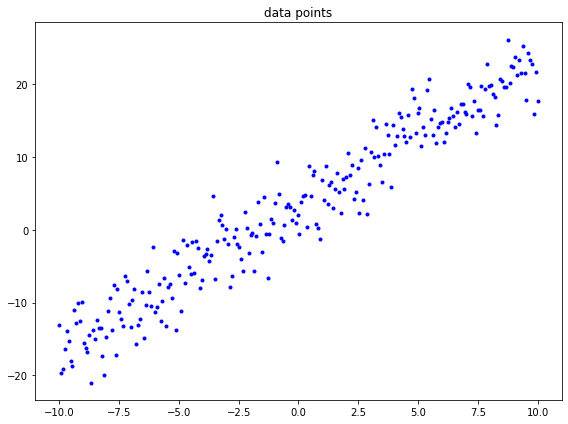

In [2]:
filename    = 'assignment_06_data.csv'
data        = np.loadtxt(filename, delimiter = ',')

x           = data[0, :]    # independent variable
y           = data[1, :]    # dependent variable

plt.figure(figsize=(8,6))

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')

plt.tight_layout()
plt.show()

## compute the residual

In [3]:
def compute_residual(x, y, theta0, theta1):

    n           = len(x)
    residual    = np.zeros(n)

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    f_hat = theta0 * np.ones(n) + theta1 * x
    residual = f_hat - y
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return residual

## compute the loss
- useful functions: `np.inner`

In [4]:
def compute_loss(x, y, theta0, theta1):
    
    n           = len(x)
    loss        = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    residual = compute_residual(x, y, theta0, theta1)
    loss = (np.inner(residual, residual))/(2*n)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return loss

## compute the gradient with respect to $\theta_0$
- useful functions: `np.inner`

In [5]:
def compute_gradient_theta0(x, y, theta0, theta1):

    n           = len(x)
    derivative  = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    derivative = np.inner(compute_residual(x, y, theta0, theta1), np.ones(n))/n

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return derivative

## compute the gradient with respect to $\theta_1$
- useful functions: `np.inner`

In [6]:
def compute_gradient_theta1(x, y, theta0, theta1):

    n           = len(x)
    derivative  = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    derivative = np.inner(compute_residual(x, y, theta0, theta1), x)/n
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return derivative

## gradient descent for the optimization 

In [7]:
number_iteration    = 500
learning_rate       = 0.01

theta0              = 0
theta1              = 0

list_theta0         = np.zeros(number_iteration)
list_theta1         = np.zeros(number_iteration)
list_loss           = np.zeros(number_iteration)

for i in range(number_iteration):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    t0 = theta0
    t1 = theta1

    theta0  = t0 - learning_rate * compute_gradient_theta0(x, y, t0, t1)
    theta1  = t1 - learning_rate * compute_gradient_theta1(x, y, t0, t1)
    loss    = compute_loss(x, y, theta0, theta1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    list_theta0[i]  = theta0
    list_theta1[i]  = theta1
    list_loss[i]    = loss

___

___

## functions for presenting the results

___

___

In [8]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.plot(x, y, '.', color='blue')
    plt.title('data points')
    plt.show()

In [9]:
def function_result_02():

    plt.figure(figsize=(8,6))
    ax = plt.gca()
    plt.plot(list_theta0, '-', color='blue', label=r'$\theta_0$')
    plt.plot(list_theta1, '-', color='red', label=r'$\theta_1$')
    plt.title('model parameters')
    ax.legend()
    plt.show()

In [10]:
def function_result_03():

    plt.figure(figsize=(8,6))
    plt.plot(list_loss, '-', color='blue')
    plt.title('loss curve')
    plt.show()

In [11]:
def function_result_04():

    f = theta0 + theta1 * x

    plt.figure(figsize=(8,6))
    ax = plt.gca()
    plt.plot(x, y, '.', color='blue', label='data point')
    plt.plot(x, f, '-', color='red', label='regression')
    plt.title('regression')
    ax.legend()
    plt.show()

In [12]:
def function_result_05():

    X0  = np.arange(-10, 10, 0.1)
    X1  = np.arange(-10, 10, 0.1)

    grid_theta0, grid_theta1 = np.meshgrid(X0, X1)

    grid_loss   = np.zeros(grid_theta0.shape)

    for i, t0 in enumerate(X0):
        for j, t1 in enumerate(X1):

            grid_loss[j, i] = compute_loss(x, y, t0, t1)

    fig = plt.figure(figsize=(8,6))

    ax  = fig.add_subplot(111, projection='3d')
    plt.title('loss surface')

    ax  = plt.axes(projection='3d')

    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_zlabel('loss')

    ax.plot_surface(grid_theta0, grid_theta1, grid_loss, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

    plt.tight_layout()
    plt.show()
    

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


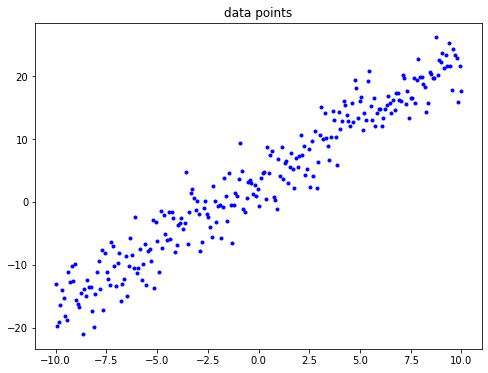

**************************************************
## [RESULT 02]
**************************************************


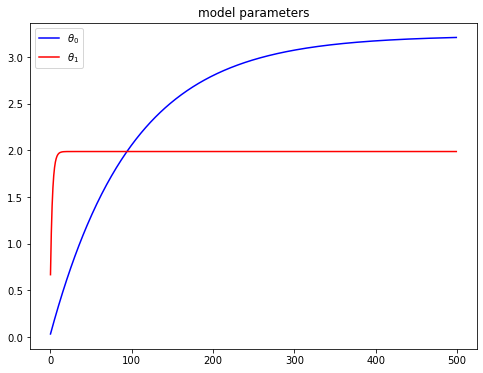

**************************************************
## [RESULT 03]
**************************************************


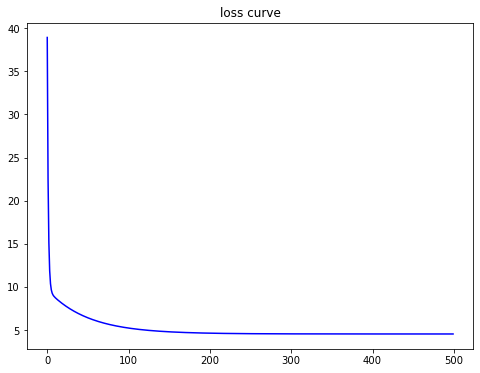

**************************************************
## [RESULT 04]
**************************************************


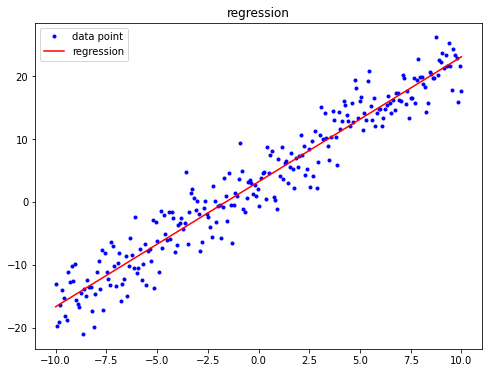

**************************************************
## [RESULT 05]
**************************************************


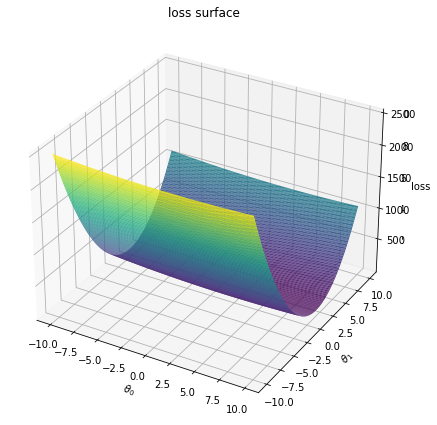

In [13]:
number_result = 5

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)